In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [2]:
a=pd.read_csv("HRDatasets.csv")
a.columns=a.columns.str.strip()

## quick looks

In [3]:
print(a)
print(a.head())
print(a.tail())

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [4]:
print("\nDataFrame info():")
a.info()


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State           

In [5]:
print("\nMissibng values per column:")
print(a.isnull().sum())


Missibng values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource  

In [6]:
#salary to float(coerce avoids crashes if any stray text is present) 
a['Salary']=pd.to_numeric(a['Salary'],errors='coerce')
# dates parsed as day-first to match your format string
a['DateofHire']=pd.to_datetime(a['DateofHire'],format='%d-%m-%Y',errors='coerce')
a['DOB']=pd.to_datetime(a['DOB'],format='%d-%m-%Y',errors='coerce')
a['DateofTermination']=pd.to_datetime(a['DateofTermination'],format='%d-%m-%Y',errors='coerce')
a['LastPerformanceReview_Date']=pd.to_datetime(a['LastPerformanceReview_Date'],format='%d-%m-%Y',errors='coerce')

In [7]:
print("\nDescribe(numeric columns):")
print(a.select_dtypes(include=[np.number]).describe())


Describe(numeric columns):
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25

In [8]:
# frequency Tables
print("\nMarital Data")
print(a['MaritalDesc'].value_counts())
print("\nDepartment Data")
print(a['Department'].value_counts())
print("\nPosition Data")
print(a['Position'].value_counts())
print("\nManager Data")
print(a['ManagerName'].value_counts())


Marital Data
MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

Department Data
Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

Position Data
Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. A

In [9]:
# metrics
total_employees=len(a)
print(f'\nTotal Employees: {total_employees}')


Total Employees: 311


In [10]:
# filling missing termination dates with the sentinel string
a['DateofTermination']=a['DateofTermination'].astype('object')
a['DateofTermination']=a['DateofTermination'].where(a['DateofTermination'].notna(),'CurrentlyWorking')
print("\nDateofTermination column values:")
print(a['DateofTermination'])


DateofTermination column values:
0         CurrentlyWorking
1      2016-06-16 00:00:00
2      2012-09-24 00:00:00
3         CurrentlyWorking
4      2016-06-09 00:00:00
              ...         
306       CurrentlyWorking
307    2015-09-29 00:00:00
308       CurrentlyWorking
309       CurrentlyWorking
310       CurrentlyWorking
Name: DateofTermination, Length: 311, dtype: object


In [11]:
# counts based on your sentinel logic
employees_left_count=(a['DateofTermination']!='CurrentlyWorking').sum()
print(f"\nNumber of employees who have left: {employees_left_count}")
currently_working_count=(a['DateofTermination']=='CurrentlyWorking').sum()
print(f"\nNumber of employees currently working: {currently_working_count}")



Number of employees who have left: 104

Number of employees currently working: 207


In [12]:
#Distinct departments
total_departments=a['Department'].nunique()
print(f'Total Departments: {total_departments}')

Total Departments: 6


In [13]:
#Average salary
average_salary=a['Salary'].mean()
print(f'Average Salary: Rs.{average_salary:.2f}')

Average Salary: Rs.69020.68


In [14]:
#tenures (years) from (DateofHire)
now_ts=pd.Timestamp(datetime.now())
a['YearsWithCompany']=(now_ts-a['DateofHire']).dt.days/365.25
average_years_with_company=a['YearsWithCompany'].mean()
print(f'Average Year with Company:{average_years_with_company:.2f}')

Average Year with Company:12.53


In [15]:
#age(years) from DOB
a['Age']=(now_ts-a['DOB']).dt.days/365.25
average_age=a['Age'].mean()
print(f'Average Age:{average_age:.2f}')

Average Age:46.16


In [16]:
#Attrition rate( your formula)
attrition_rate=(employees_left_count/total_employees)*100
print(f'Attrition Rate:{attrition_rate:.2f}%')

Attrition Rate:33.44%


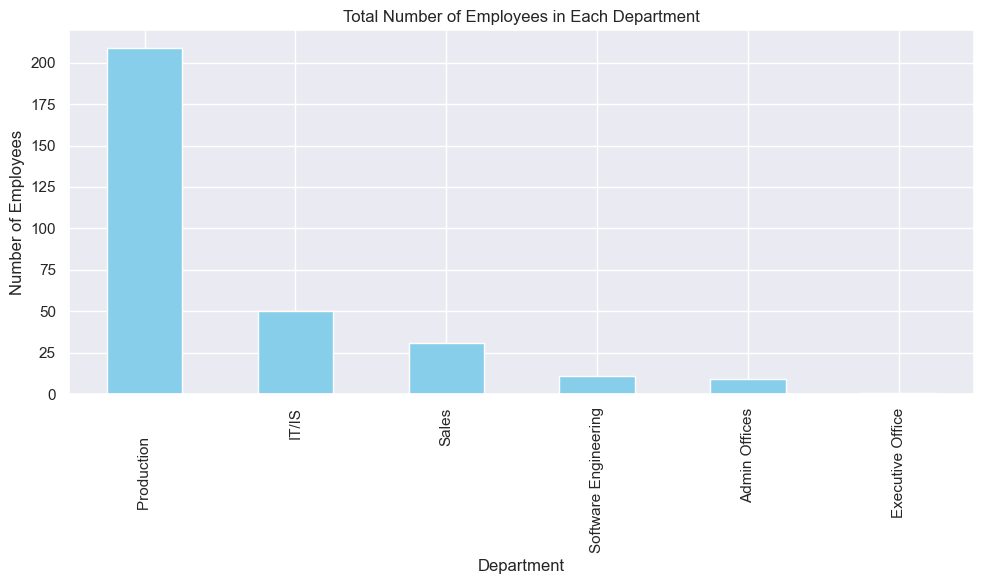

In [17]:
#Employees per Department
department_counts=a['Department'].value_counts()
plt.figure(figsize=(10,6))
department_counts.plot(kind='bar',color='skyblue')
plt.title('Total Number of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

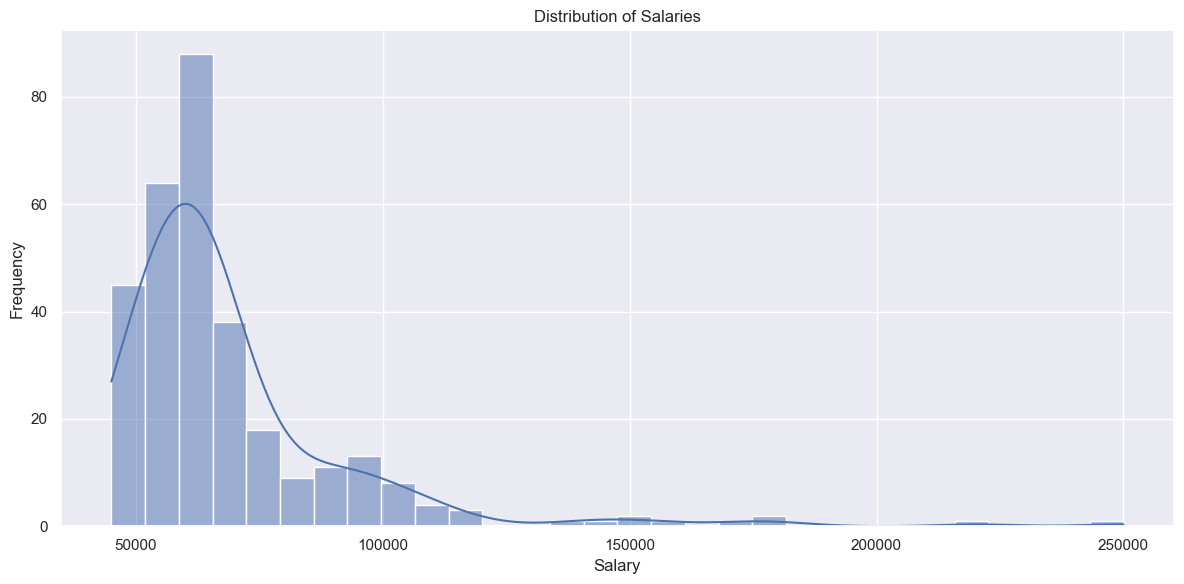

In [18]:
#histogram of salaries
plt.figure(figsize=(12,6))
sns.histplot(a['Salary'],bins=30,kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

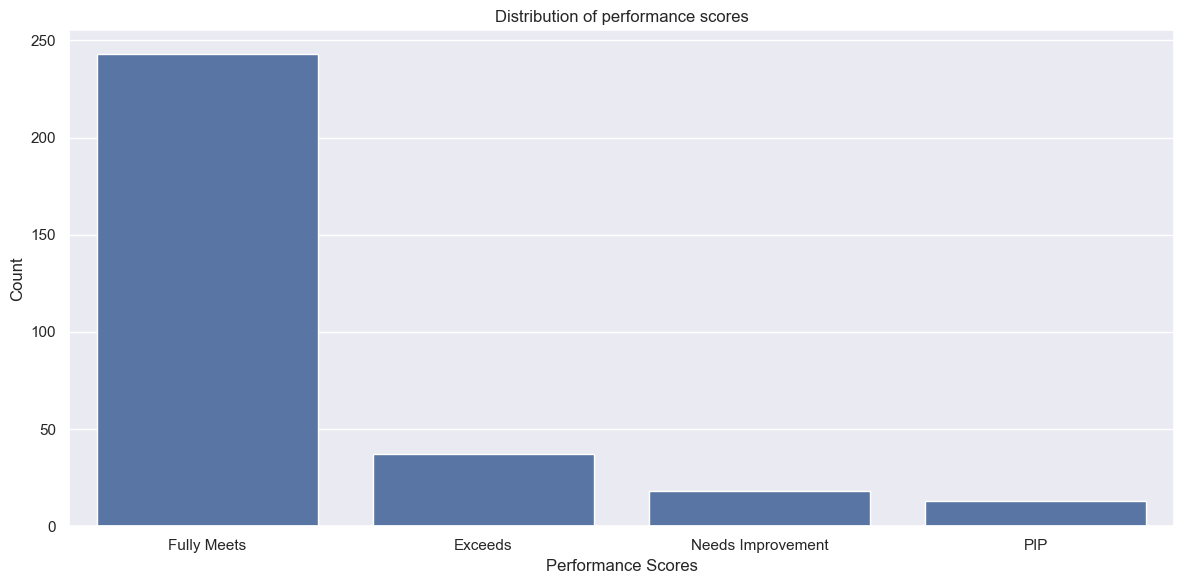

In [19]:
#countplot: performance score
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='PerformanceScore',order=a['PerformanceScore'].value_counts().index)
plt.title('Distribution of performance scores')
plt.xlabel('Performance Scores')
plt.ylabel('Count')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

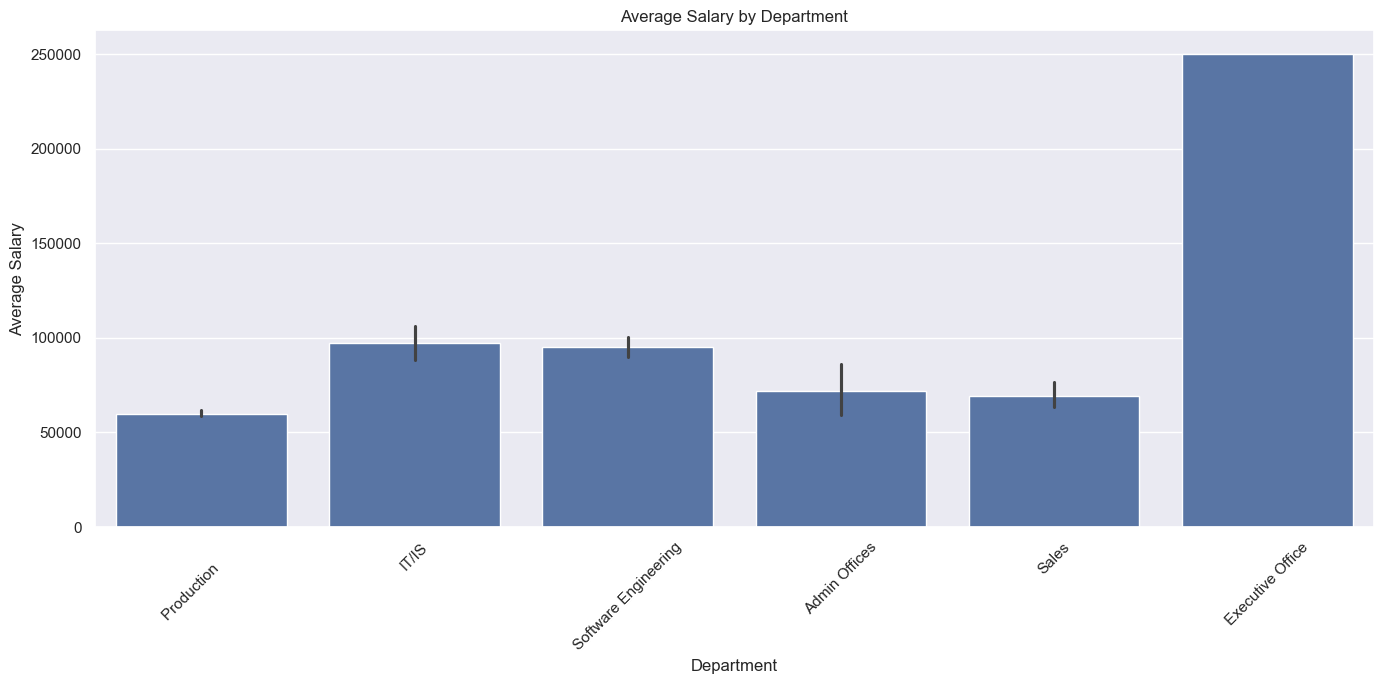

In [20]:
#bar: average salary by department
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='Department',y='Salary',estimator=np.mean)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

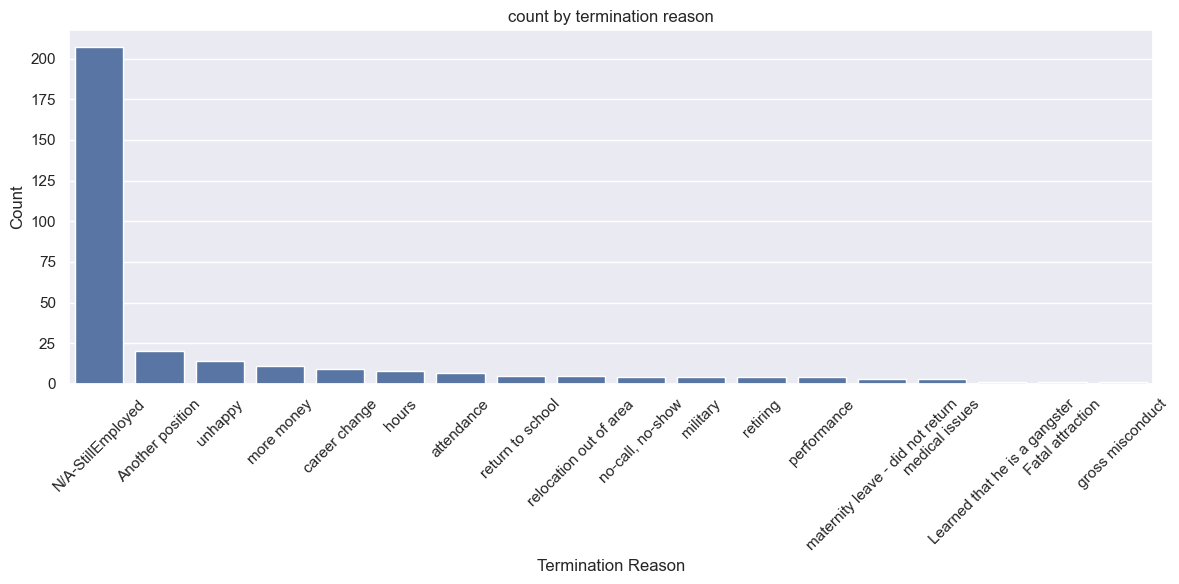

In [21]:
#countplot:termination by reason
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='TermReason',order=a['TermReason'].value_counts().index)
plt.title('count by termination reason')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

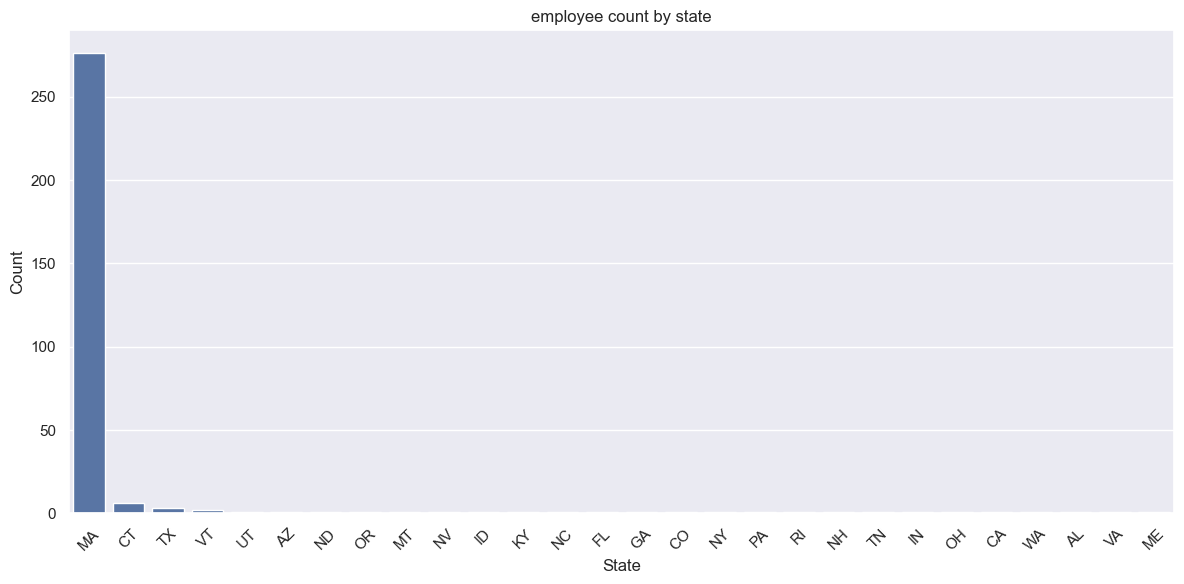

In [22]:
#countplot:employee count by state
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='State',order=a['State'].value_counts().index)
plt.title('employee count by state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

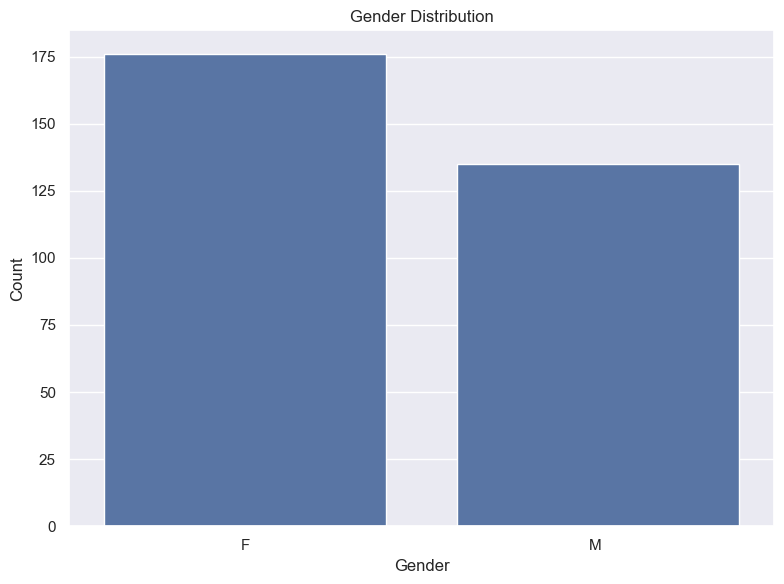

In [23]:
#countplot:Gender distribution
plt.figure(figsize=(8,6))
sns.countplot(data=a,x='Sex',order=a['Sex'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show

AttributeError: module 'matplotlib.pyplot' has no attribute 'Title'

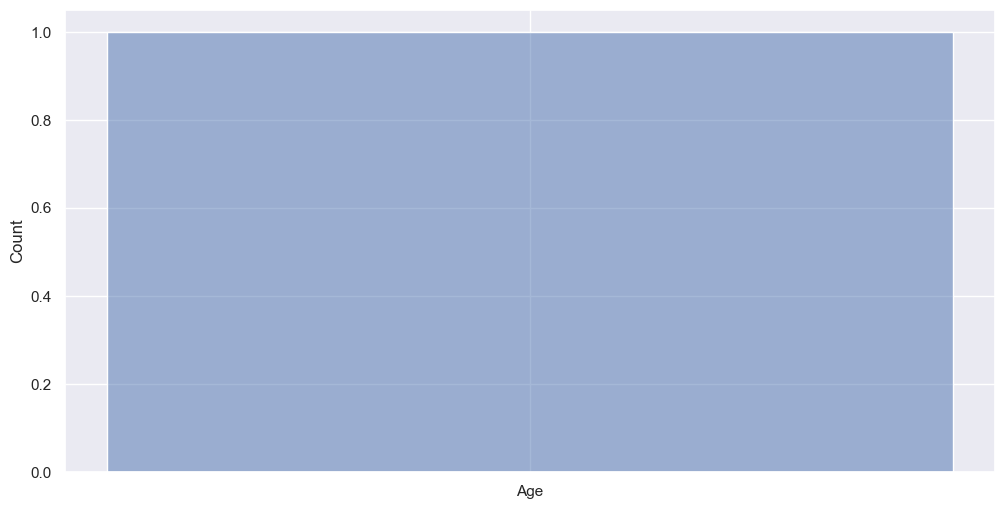

In [24]:
#histogram of age
plt.figure(figsize=(12,6))
sns.histplot(['Age'], bins=30, kde=True)
plt.Title('Distribution of Employee ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.tight_layout()
plt.show

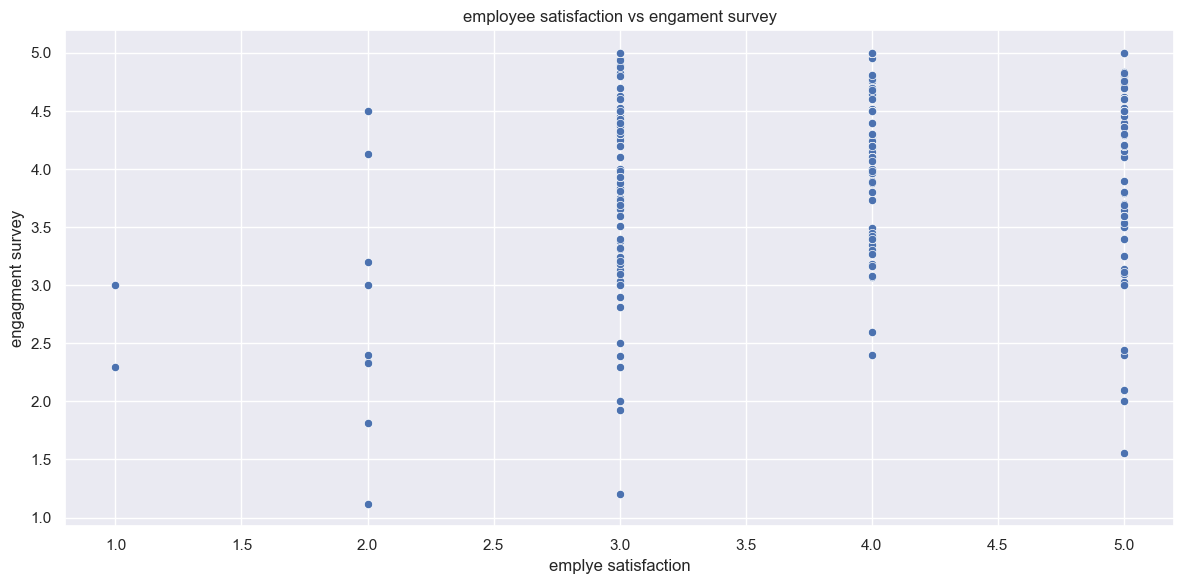

In [32]:
#scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=a,x='EmpSatisfaction',y='EngagementSurvey')
plt.title('employee satisfaction vs engament survey')
plt.xlabel('emplye satisfaction')
plt.ylabel('engagment survey')
plt.tight_layout()
plt.show()

In [ ]:
#bar: total abcence in department
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='Department',y='Absences',estimator=np.sum, ci=None)
plt.title('total absence by Department')
plt.xlabel('Department')
plt.ylabel('total absence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

In [ ]:
#Vioin salary by gender
plt.figure(figsize=(12,6))
sns.violinplot(data=a,x='Sex',y='Salary',inner='quartile')
plt.title('salary distribution by gender')
plt.xlabel('gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [ ]:
#Vioin salary by gender
plt.figure(figsize=(12,6))
sns.violinplot(data=a,x='Sex',y='Salary',inner='box')
plt.title('salary distribution by gender')
plt.xlabel('gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [ ]:
#countplot:turnover by marital status
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='MaritalDesc',hue='Termd', order=a['MaritalDesc'].value_counts().index)
plt.title('turnover by marital status')
plt.xlabel('marital status')
plt.ylabel('Count')
plt.legend(title='Terminated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
#bar:average absence by performance score
plt.figure(figsize=(12,6))
sns.barplot(data=a,x='PerformanceScore',y='Absences',estimator=np.mean, ci=None, order=a['PerformanceScore'].value_counts().index)
plt.title('absence by performance score')
plt.xlabel('performance score')
plt.ylabel('average absence')
plt.tight_layout()
plt.show() 

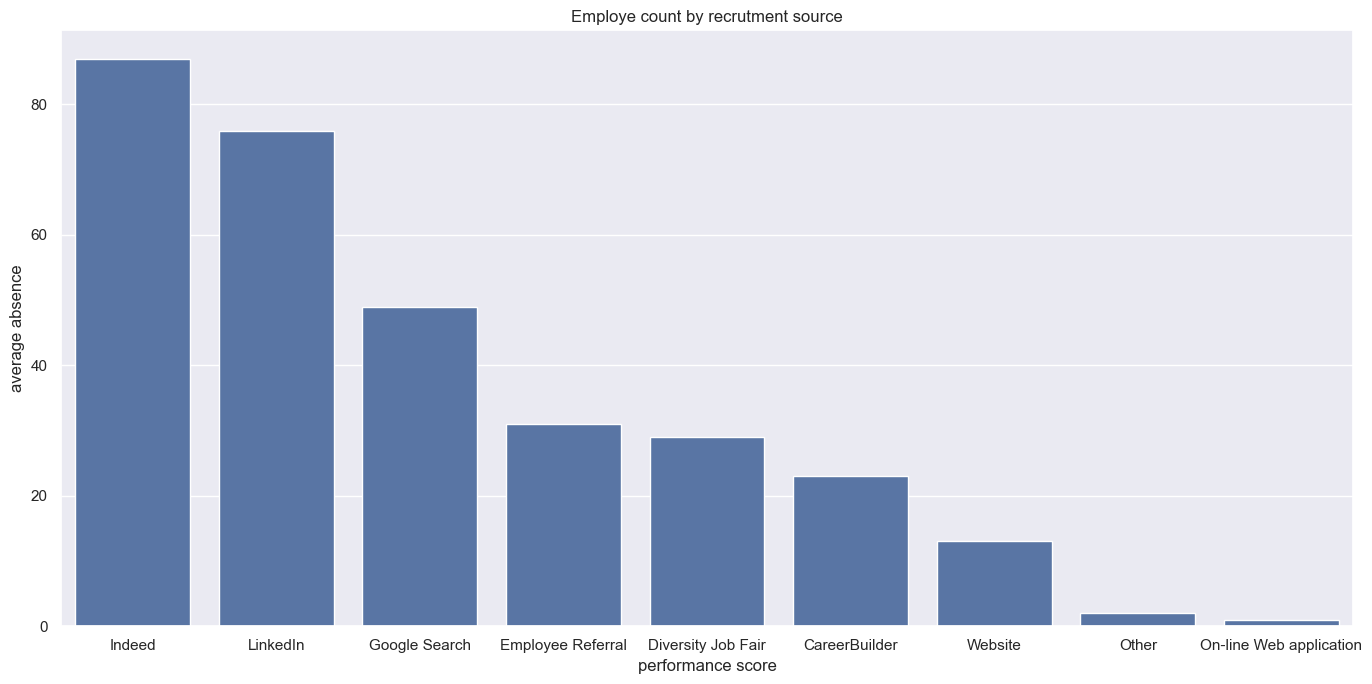

In [28]:
# employe count by recrutment source
plt.figure(figsize=(14,7))
sns.countplot(data=a, x='RecruitmentSource', order=a['RecruitmentSource'].value_counts().index)
plt.title('Employe count by recrutment source')
plt.xlabel('recruitment source')
plt.ylabel('count')
plt.tight_layout()
plt.show() 

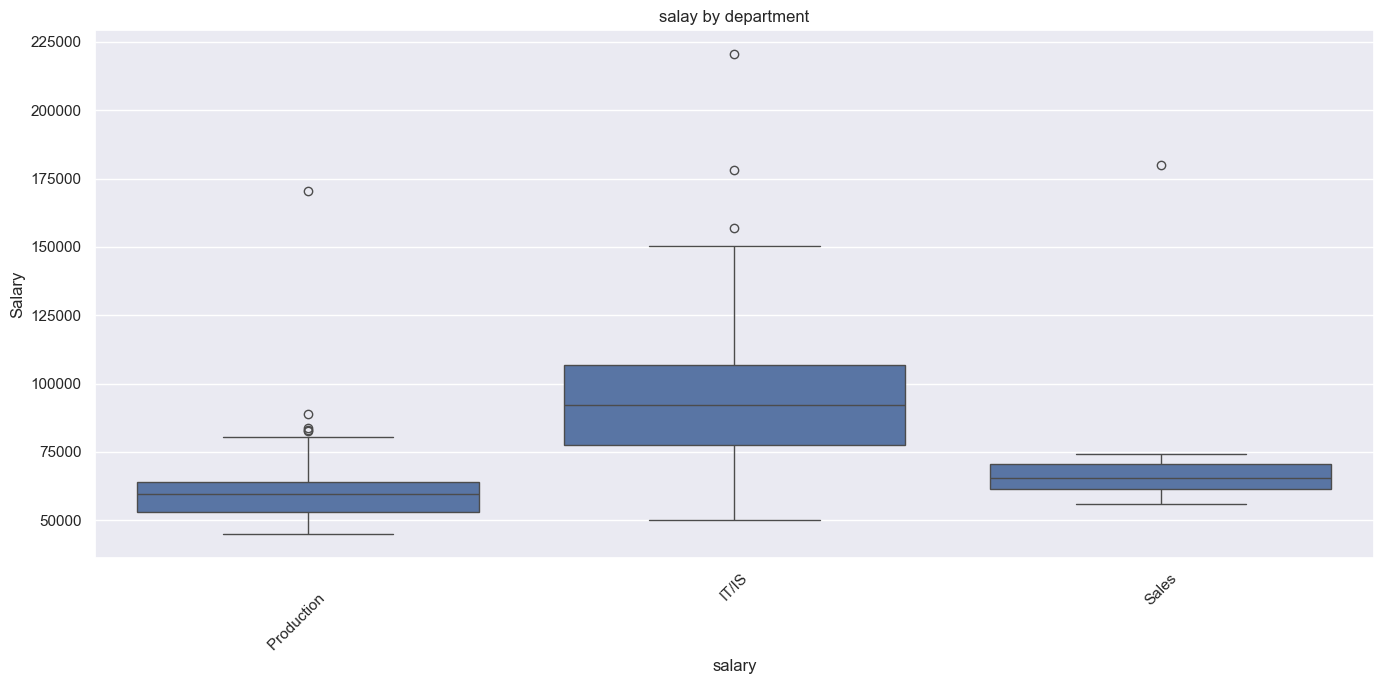

In [31]:
top3=a['Department'].value_counts().index[:3]
plt.figure(figsize=(14,7))
sns.boxplot(data=a[a['Department'].isin(top3)],x='Department',y='Salary')
plt.title('salay by department')
plt.xlabel('salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

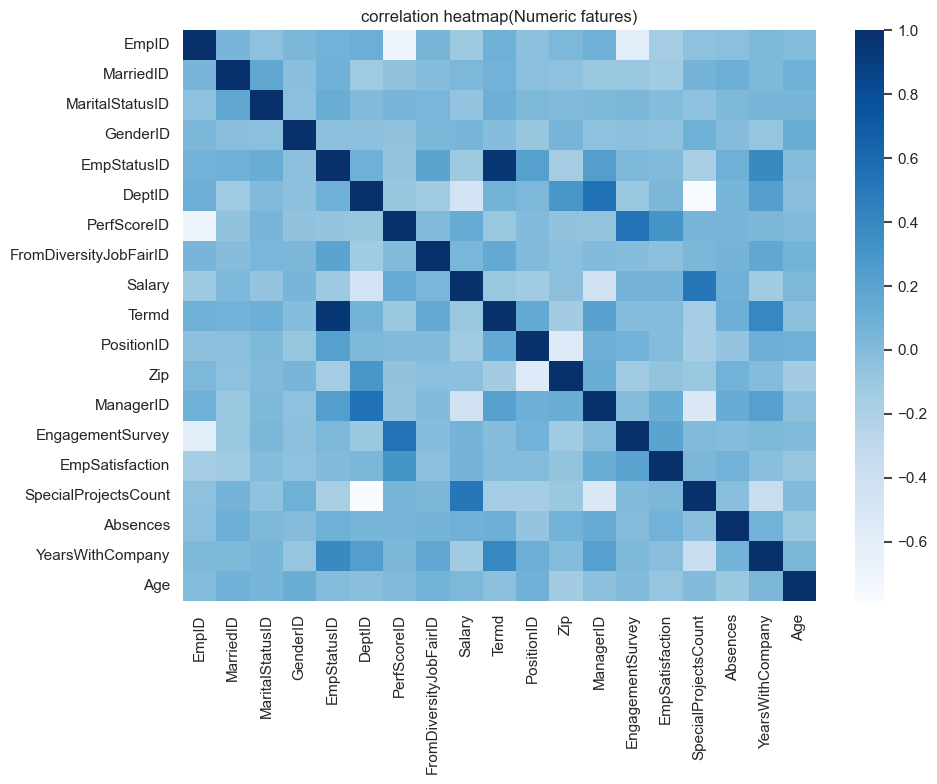

In [33]:
# correlation heatmap
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=False,cmap='Blues')
plt.title('correlation heatmap(Numeric fatures)')
plt.tight_layout()
plt.show() 

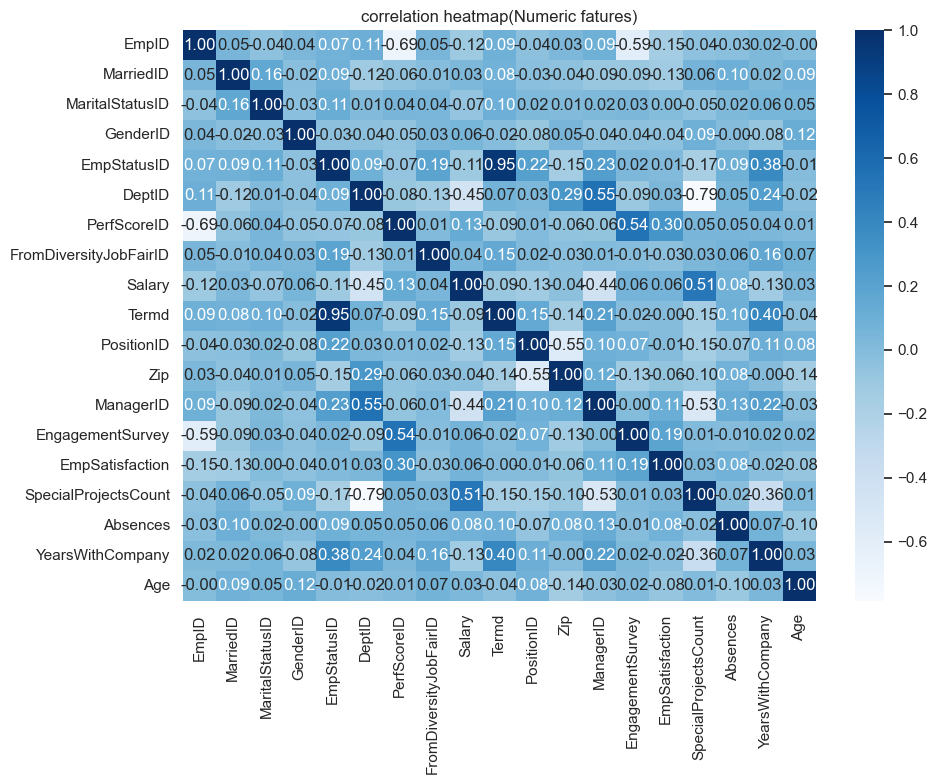

In [34]:
# correlation heatmap
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=True, fmt='.2f',cmap='Blues')
plt.title('correlation heatmap(Numeric fatures)')
plt.tight_layout()
plt.show() 

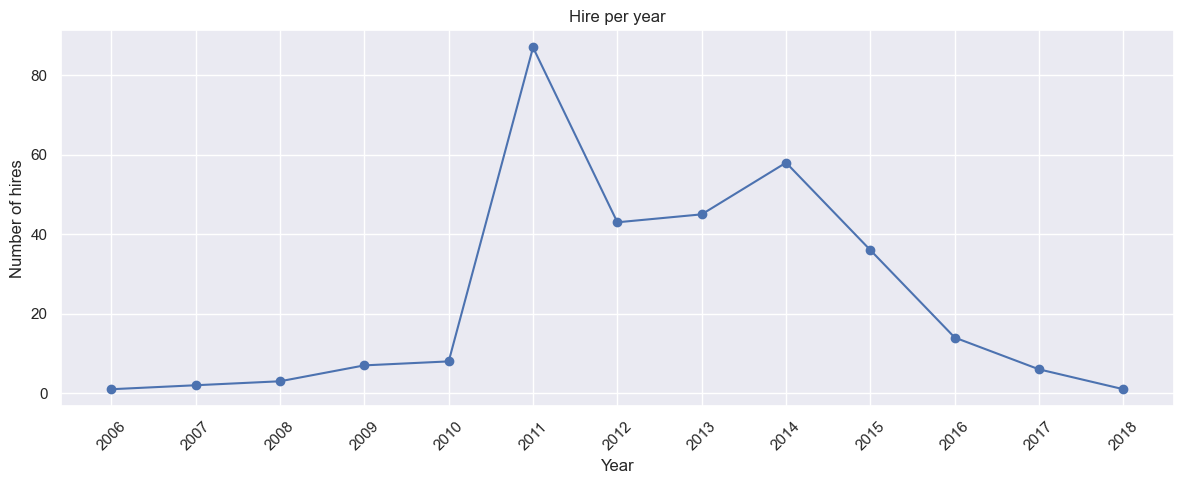

In [37]:
# line plot
hires_per_year=a['DateofHire'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(hires_per_year.index.astype(str),hires_per_year.values, marker='o')
plt.title('Hire per year')
plt.xlabel('Year')
plt.ylabel('Number of hires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

In [45]:
#EDA REPORT
print("\n"+"="*70)
print("="*70)
print(f"Rows:{a.shape[0]} | Column{a.shape[1]}")
print(f"Top Department by headcount:{a['Department'].value_counts().idxmax()}")
print(f"Most common position:{a['Position'].value_counts().idxmax()}")
print(f"Attrition rate:{attrition_rate:.2f}%")
print(f"Average salay:Rs{average_salary:.2f}%")
print(f"Average age:{a['Age'].mean():.1f} | min:{a['Age'].min():.1f} | max:{a['Age'].max():.1f}")
print(f"Average Tenure:{a['YearsWithCompany'].mean():.2f}years")
print("="*70)


Rows:311 | Column37
Top Department by headcount:Production       
Most common position:Production Technician I
Attrition rate:33.44%
Average salay:Rs69020.68%
Average age:46.2 | min:27.0 | max:73.6
Average Tenure:12.53years
